In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from PIL import Image

import acquire
import prepare

### Exercises
Do your work for this exercise in a file named explore.

Spam Data

- Load the spam data set.
- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
- Is there any overlap in the bigrams for the spam data and the ham data?
- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.
- Explore the blog articles using the techniques discussed in the exploration lesson.

- Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [11]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [12]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [13]:
#acquire data from spam_db

from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

#df = pd.read_sql(sql, url, index_col="id")


In [14]:
### spam data
### pulled it locally
df = pd.read_csv('spam_clean.csv')
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.value_counts()

label  text                                                                                                                                                                                                         
ham    Sorry, I'll call later                                                                                                                                                                                           30
       I cant pick the phone right now. Pls send a message                                                                                                                                                              12
       Ok...                                                                                                                                                                                                            10
spam   Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£

In [16]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [17]:
# combine all messages in single string by label

ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [18]:
#giving us frequency
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

# seperated in 3 series and can concat them together

In [19]:
# concat all frequencies together into a dataframe

word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
i,2305,45,2350
you,1837,287,2124
to,1554,686,2240
the,1118,204,1322
a,1055,376,1431


In [20]:
word_counts.sort_values('all', ascending=False).head(20)

,ham,spam,all
i,2305,45,2350
to,1554,686,2240
you,1837,287,2124
a,1055,376,1431
the,1118,204,1322
u,986,147,1133
and,848,122,970
is,728,158,886
in,811,73,884
me,756,30,786


In [21]:
# sort by 'ham' and 'spam' columns
word_counts.sort_values(['ham', 'spam'], ascending=[True, False]).head(20)

,ham,spam,all
claim,0,113,113
prize,0,92,92
won,0,73,73
guaranteed,0,50,50
tone,0,48,48
18,0,43,43
awarded,0,38,38
a1000,0,35,35
150ppm,0,34,34
a2000,0,31,31


Text(0.5, 1.0, 'Ham vs Spam count for the top 20 most frequent words')

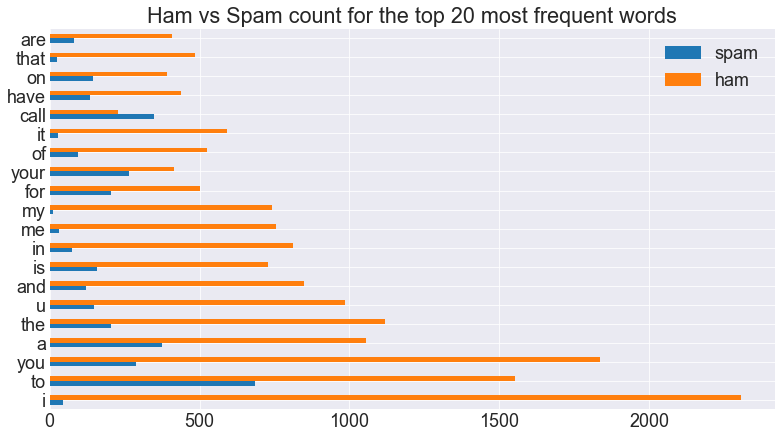

In [22]:
plt.rc('font', size=18)
word_counts.sort_values('all', ascending=False).head(20)[['spam', 'ham']].plot.barh()
plt.title('Ham vs Spam count for the top 20 most frequent words')

#database is unbalanced so be good to normalize it

Text(0.5, 1.0, '% of spam vs ham for the most common 20 words')

<Figure size 1152x648 with 0 Axes>

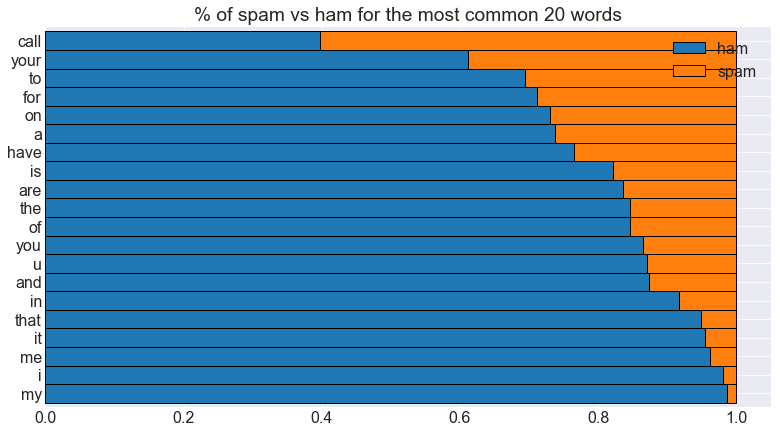

In [23]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=16)

(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by = 'spam')
 .plot.barh(stacked = True, width = 1, ec = 'k')
)
plt.title('% of spam vs ham for the most common 20 words')

In [24]:
### word cloud

(-0.5, 799.5, 599.5, -0.5)

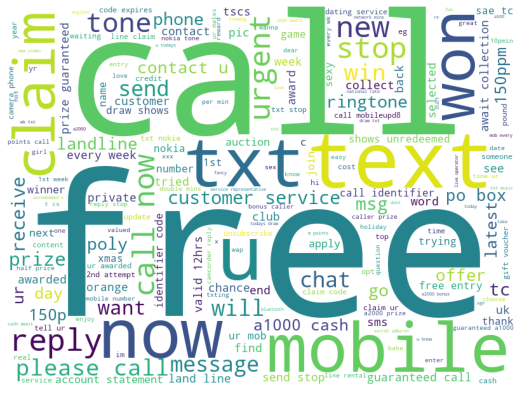

In [25]:
### SPAM WORDS

from wordcloud import WordCloud
img = WordCloud(background_color='white', width=800, height=600).generate(spam_words)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

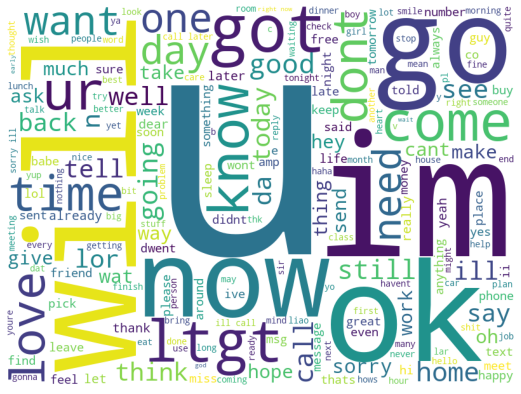

In [26]:
### HAM WORDS

# you can do it with any image you can find, 
from wordcloud import WordCloud
img = WordCloud(background_color='white', width=800, height=600).generate(ham_words)
plt.imshow(img)
plt.axis('off')

In [27]:
(word_counts
 [(word_counts.spam > 10) & (word_counts.ham > 10)]
 .assign(ratio=lambda df: df.spam / (df.ham + .01))
 .sort_values(by='ratio')
 .pipe(lambda df: pd.concat([df.head(), df.tail()])))

,ham,spam,all,ratio
i,2305,45,2350,0.019523
im,449,13,462,0.028953
its,297,11,308,0.037036
me,756,30,786,0.039682
when,273,12,285,0.043954
contact,12,56,68,4.662781
cash,12,62,74,5.162365
win,11,60,71,5.449591
mobile,15,123,138,8.194537
txt,13,150,163,11.529593


In [28]:
df['message_length'] = df.text.apply(len)

df['word_count'] = df.text.apply(str.split).apply(len)

df['avg_word_length'] = df.message_length / df.word_count

df.head()

,label,text,message_length,word_count,avg_word_length
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,5.550000
1,ham,Ok lar... Joking wif u oni...,29,6,4.833333
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,5.535714
3,ham,U dun say so early hor... U c already then say...,49,11,4.454545
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,4.692308


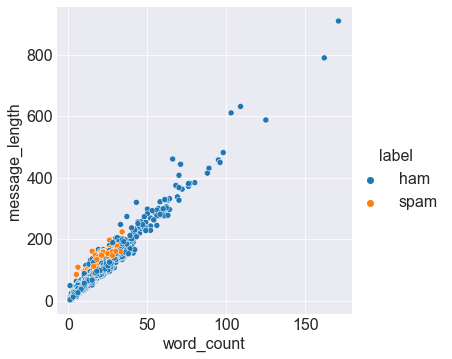

In [29]:
sns.relplot(data = df, x = 'word_count', y = 'message_length', hue = 'label')


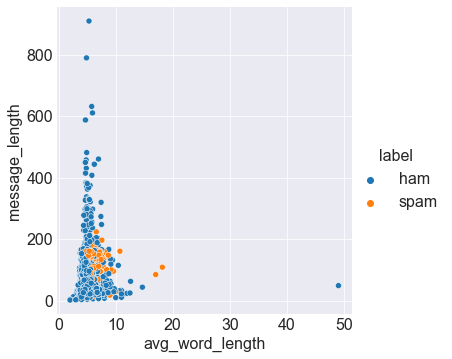

In [30]:
sns.relplot(data = df, x = 'avg_word_length', y = 'message_length', hue = 'label')


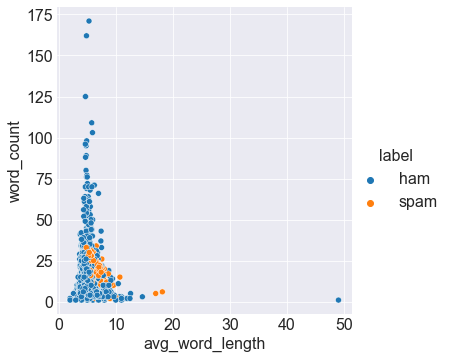

In [31]:
sns.relplot(data = df, x = 'avg_word_length', y = 'word_count', hue = 'label')


In [ ]:
#####################

In [32]:
pd.Series(nltk.bigrams(spam_words.split())).value_counts()


(you, have)                73
(have, won)                54
(your, mobile)             49
(to, claim)                46
(please, call)             44
                           ..
(lost, 3pound)              1
(88066, from)               1
(wwwtextcompcom, 88066)     1
(88877, now)                1
(now1, only)                1
Length: 8719, dtype: int64

In [33]:
spam_bigrams = (pd.Series(nltk.bigrams(spam_words.split())).head(20))


In [34]:
top_20_spam_bigrams = (pd.Series(nltk.ngrams(spam_words.split(), 2))
                      .value_counts()
                      .head(20))

In [35]:
#from class 
top_20_ham_bigrams.sort_values().plot.barh(color='red', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

NameError: name 'top_20_ham_bigrams' is not defined

In [36]:
top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words.split(), 2))
                      .value_counts()
                      .head(20))

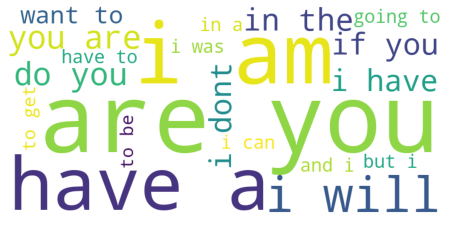

In [37]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [38]:
def starwars(text):
    plt.figure(figsize=(16,9))
    starwars_mask = np.array(Image.open("starwars.jpg"))

    wc = WordCloud(background_color="black", colormap = 'coolwarm',width=800, height=400, contour_width=5, contour_color='green',mask=starwars_mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

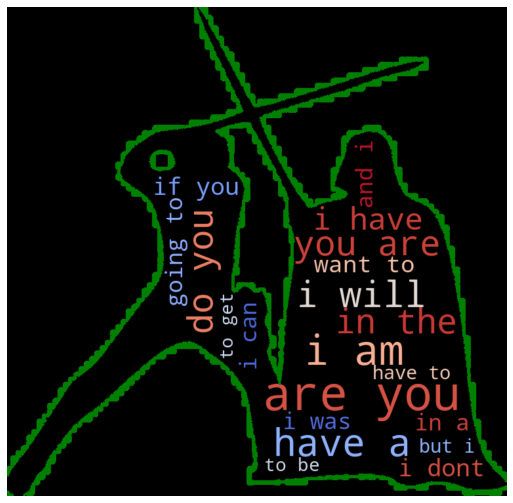

In [39]:
# LOLS
starwars(data)

In [40]:
ham_bigrams = (pd.Series(nltk.bigrams(ham_words.split())).head(20))


In [41]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}


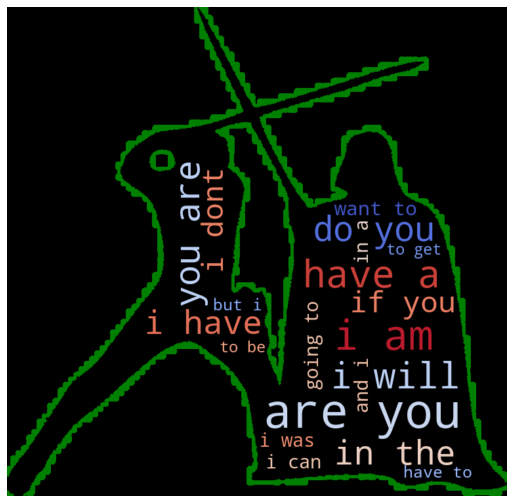

In [42]:
#Ham
starwars(data)

In [43]:
ham_bigrams = (pd.Series(nltk.bigrams(ham_words.split())).head(20))
top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words.split(), 2))
                      .value_counts()
                      .head(20))

ham_data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}

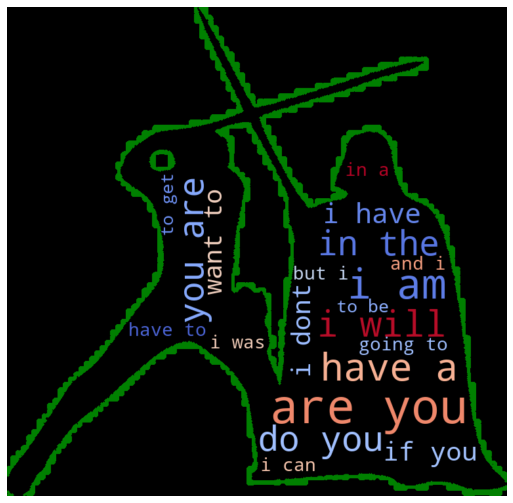

In [44]:
starwars(ham_data)

In [45]:
top_20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words.split(), 3))
                      .value_counts()
                      .head(20))

top_20_spam_trigrams

(you, have, won)             37
(have, won, a)               33
(prize, guaranteed, call)    21
(a1000, cash, or)            19
(urgent, your, mobile)       18
(to, contact, u)             18
(account, statement, for)    16
(valid, 12hrs, only)         16
(from, land, line)           16
(to, contact, you)           16
(is, the, 2nd)               15
(trying, to, contact)        15
(this, is, the)              15
(cash, or, a)                15
(we, are, trying)            14
(draw, shows, that)          14
(land, line, claim)          14
(shows, that, you)           14
(are, trying, to)            14
(reply, or, call)            14
dtype: int64

Text(0.5, 0, '# Occurances')

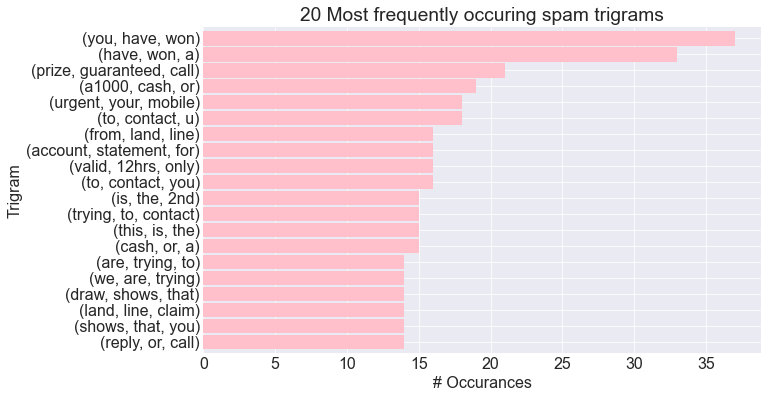

In [46]:
top_20_spam_trigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring spam trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')
# make the labels pretty
# ticks, _ = plt.yticks()
# labels = top_20_spam_trigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
# _ = plt.yticks(ticks, labels)

In [47]:
top_20_ham_trigrams = (pd.Series(nltk.ngrams(ham_words.split(), 3))
                      .value_counts()
                      .head(20))

top_20_ham_trigrams

(ill, call, later)    39
(sorry, ill, call)    38
(how, are, you)       35
(i, want, to)         29
(let, me, know)       26
(have, a, great)      25
(i, miss, you)        24
(i, love, you)        23
(i, have, to)         20
(hope, you, are)      20
(give, me, a)         19
(i, dont, know)       19
(happy, new, year)    18
(do, have, a)         17
(a, great, day)       17
(i, am, in)           16
(are, you, doing)     16
(what, are, you)      16
(on, the, way)        16
(you, want, to)       16
dtype: int64

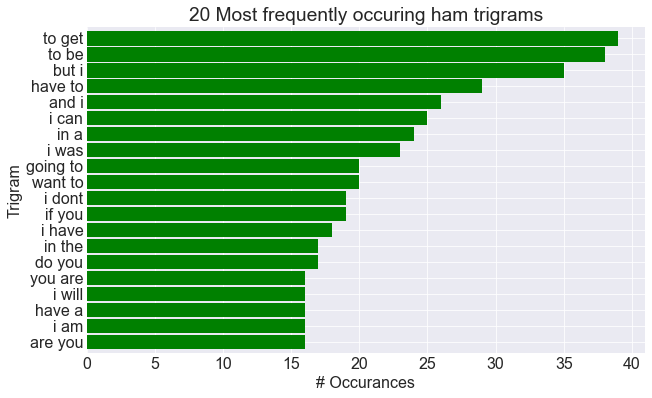

In [48]:
top_20_ham_trigrams.sort_values().plot.barh(color='green', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham trigrams')
plt.ylabel('Trigram')
plt.xlabel('# Occurances')
# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [49]:
#dropping top 20 and including all
spam_bigrams = (pd.Series(nltk.bigrams(spam_words.split())))
spam_bigrams

0                   (free, entry)
1                     (entry, in)
2                         (in, 2)
3                          (2, a)
4                       (a, wkly)
                   ...           
17588                (now1, only)
17589                 (only, 10p)
17590                  (10p, per)
17591               (per, minute)
17592    (minute, btnationalrate)
Length: 17593, dtype: object

In [50]:
ham_bigrams = (pd.Series(nltk.bigrams(ham_words.split())))
ham_bigrams


0               (go, until)
1           (until, jurong)
2           (jurong, point)
3            (point, crazy)
4        (crazy, available)
                ...        
67509           (rofl, its)
67510           (its, true)
67511            (true, to)
67512             (to, its)
67513           (its, name)
Length: 67514, dtype: object

In [52]:
spam_trigrams = (pd.Series(nltk.trigrams(spam_words.split())))
spam_trigrams

0                    (free, entry, in)
1                       (entry, in, 2)
2                           (in, 2, a)
3                         (2, a, wkly)
4                      (a, wkly, comp)
                     ...              
17587       (087187272008, now1, only)
17588                (now1, only, 10p)
17589                 (only, 10p, per)
17590               (10p, per, minute)
17591    (per, minute, btnationalrate)
Length: 17592, dtype: object

## 2. Explore the blog articles using the techniques discussed in the exploration lesson

In [2]:
codeup_df = acquire.get_blog_articles()
codeup_df.head()

,title,published,content
0,Codeup Dallas Open House,"Nov 30, 2021",Come join us for the re-opening of our Dallas ...
1,Codeup’s Placement Team Continues Setting Records,"Nov 19, 2021",Our Placement Team is simply defined as a grou...
2,"IT Certifications 101: Why They Matter, and Wh...","Nov 18, 2021","AWS, Google, Azure, Red Hat, CompTIA…these are..."
3,A rise in cyber attacks means opportunities fo...,"Nov 17, 2021","In the last few months, the US has experienced..."
4,Use your GI Bill® benefits to Land a Job in Tech,"Nov 4, 2021","As the end of military service gets closer, ma..."


In [3]:
df_clean = prepare.prep_article_data(codeup_df, 'content', extra_words=[], exclude_words=[])
df_clean.head()

,title,published,content,clean,stemmed,lemmatized
0,Codeup Dallas Open House,"Nov 30, 2021",Come join us for the re-opening of our Dallas ...,come join us reopening dallas campus drinks sn...,come join us reopen dalla campu drink snack co...,come join u reopening dallas campus drink snac...
1,Codeup’s Placement Team Continues Setting Records,"Nov 19, 2021",Our Placement Team is simply defined as a grou...,placement team simply defined group manages re...,placement team simpli defin group manag relati...,placement team simply defined group manages re...
2,"IT Certifications 101: Why They Matter, and Wh...","Nov 18, 2021","AWS, Google, Azure, Red Hat, CompTIA…these are...",aws google azure red hat comptiathese big name...,aw googl azur red hat comptiathes big name onl...,aws google azure red hat comptiathese big name...
3,A rise in cyber attacks means opportunities fo...,"Nov 17, 2021","In the last few months, the US has experienced...",last months us experienced dozens major cybera...,last month us ha experienc dozen major cyberat...,last month u ha experienced dozen major cybera...
4,Use your GI Bill® benefits to Land a Job in Tech,"Nov 4, 2021","As the end of military service gets closer, ma...",end military service gets closer many transiti...,end militari servic get closer mani transit se...,end military service get closer many transitio...


In [6]:
blog_lemma = ' '.join(codeup_df.lemmatized)
blog_lemma

'come join u reopening dallas campus drink snack codeup curious campus look like click register free event come join u reopening dallas campus drink snack codeup curious campus look like interested web development career accelerator keen chat instructor financial aid rep open house answer question meet codeup instructor help explain whats taught class answer question understand join one upcoming cohort dec 6th dont miss opportunity learn start new year transitioning new exciting career tech answer question may codeup future take first step new career today create tomorrow placement team simply defined group manages relationship employer partner graduating student help get graduating student hired last quarter placement team helped 48 student get hired lifechanging career tech last month placement team ha already placed 40 student top tech company want send huge thank placement team employer partner done tremendous job helping codeup empower life change student exactly got hired check l

In [55]:
word_counts = pd.Series(blog_lemma.split()).value_counts()
word_counts

tech           51
codeup         42
system         41
career         40
program        40
               ..
function        1
commandline     1
utility         1
command         1
proceeds        1
Length: 1402, dtype: int64

Text(0.5, 0, '# Occurances')

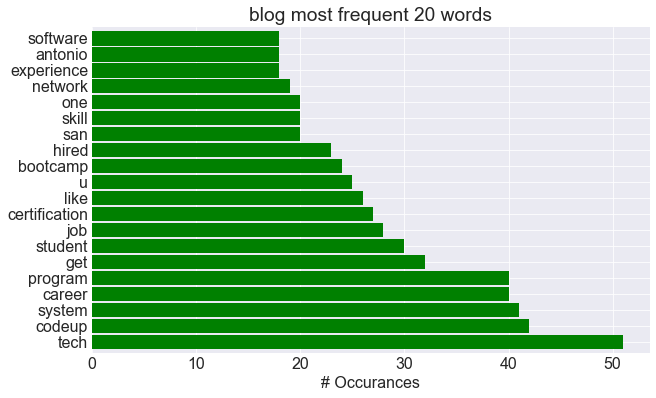

In [59]:
word_counts.head(20).plot.barh(color='green', width=.9, figsize=(10, 6))

plt.title('blog most frequent 20 words')
#plt.ylabel('Trigram')
plt.xlabel('# Occurances')

In [60]:
(pd.Series(nltk.bigrams(blog_lemma.split())))

0               (come, join)
1                  (join, u)
2             (u, reopening)
3        (reopening, dallas)
4           (dallas, campus)
                ...         
3777            (way, first)
3778          (first, apply)
3779          (apply, apply)
3780          (apply, pride)
3781    (pride, scholarship)
Length: 3782, dtype: object

In [63]:
bigrams= (pd.Series(nltk.bigrams(blog_lemma.split())))
bigrams

0               (come, join)
1                  (join, u)
2             (u, reopening)
3        (reopening, dallas)
4           (dallas, campus)
                ...         
3777            (way, first)
3778          (first, apply)
3779          (apply, apply)
3780          (apply, pride)
3781    (pride, scholarship)
Length: 3782, dtype: object

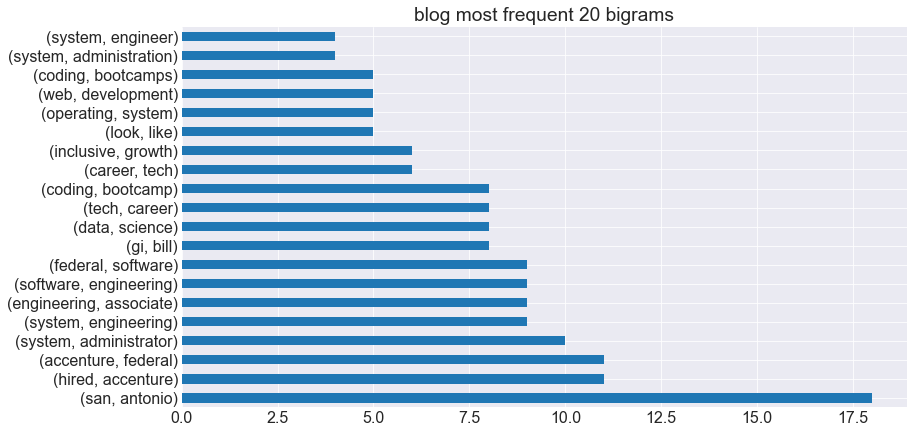

In [80]:
pd.Series(nltk.bigrams(blog_lemma.split())).value_counts().head(20).plot.barh()
plt.title('blog most frequent 20 bigrams');
#plt.ylabel('Trigram')
#plt.xlabel('# Occurances')

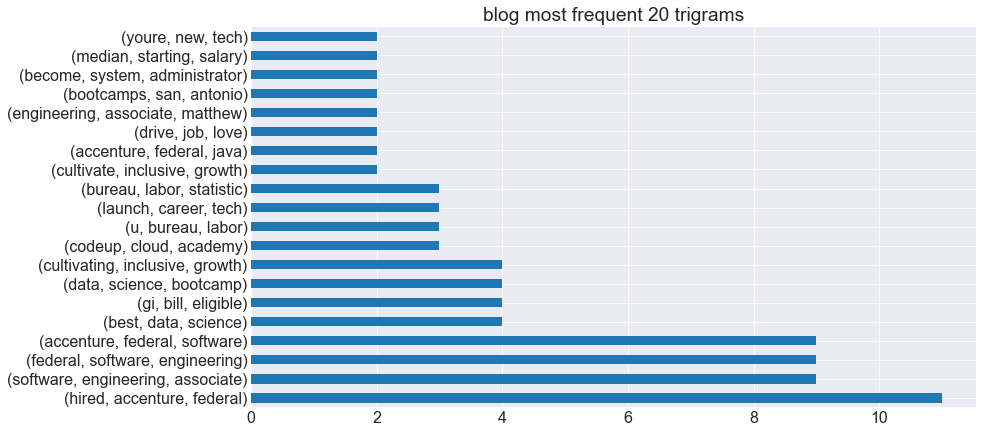

In [81]:
pd.Series(nltk.trigrams(blog_lemma.split())).value_counts().head(20).plot.barh()
plt.title('blog most frequent 20 trigrams');


In [ ]:
#####

In [85]:
news_df = acquire.get_inshorts_articles()
news_df.head()

,title,author,content,date,category
0,I used to catch Patna-Banaras train to listen ...,Pragya Swastik,Vedanta's billionaire Chairman Anil Agarwal in...,"06 Feb 2022,Sunday",business
1,There's no greater tribute to our unity than L...,Hiral Goyal,Adani Group's Chairman Gautam Adani took to Tw...,"06 Feb 2022,Sunday",business
2,Lata Mangeshkar will eternally cast her shadow...,Kiran Khatri,Biocon's Executive Chairperson Kiran Mazumdar-...,"06 Feb 2022,Sunday",business
3,"COVID, you did your worst & stole our voice: M...",Sakshita Khosla,Businessman Anand Mahindra on Sunday shared a ...,"06 Feb 2022,Sunday",business
4,Nostalgia with moist eyes & lump in throat: Ko...,Kiran Khatri,Kotak Mahindra Bank MD Uday Kotak took to Twit...,"06 Feb 2022,Sunday",business


In [90]:
#need to add words

news_df = prepare.prep_article_data(news_df, column='content', extra_words=[], exclude_words=[])
news_df.head()

,title,author,content,date,category,clean,stemmed,lemmatized
0,I used to catch Patna-Banaras train to listen ...,Pragya Swastik,Vedanta's billionaire Chairman Anil Agarwal in...,"06 Feb 2022,Sunday",business,vedantas billionaire chairman anil agarwal twe...,vedanta billionair chairman anil agarw tweet s...,vedanta billionaire chairman anil agarwal twee...
1,There's no greater tribute to our unity than L...,Hiral Goyal,Adani Group's Chairman Gautam Adani took to Tw...,"06 Feb 2022,Sunday",business,adani groups chairman gautam adani took twitte...,adani group chairman gautam adani took twitter...,adani group chairman gautam adani took twitter...
2,Lata Mangeshkar will eternally cast her shadow...,Kiran Khatri,Biocon's Executive Chairperson Kiran Mazumdar-...,"06 Feb 2022,Sunday",business,biocons executive chairperson kiran mazumdarsh...,biocon execut chairperson kiran mazumdarshaw s...,biocons executive chairperson kiran mazumdarsh...
3,"COVID, you did your worst & stole our voice: M...",Sakshita Khosla,Businessman Anand Mahindra on Sunday shared a ...,"06 Feb 2022,Sunday",business,businessman anand mahindra sunday shared pictu...,businessman anand mahindra sunday share pictur...,businessman anand mahindra sunday shared pictu...
4,Nostalgia with moist eyes & lump in throat: Ko...,Kiran Khatri,Kotak Mahindra Bank MD Uday Kotak took to Twit...,"06 Feb 2022,Sunday",business,kotak mahindra bank md uday kotak took twitter...,kotak mahindra bank md uday kotak took twitter...,kotak mahindra bank md uday kotak took twitter...


In [93]:
df = acquire.get_inshorts_articles()
df.category.value_counts()

business         25
sports           25
technology       25
entertainment    25
Name: category, dtype: int64

In [96]:
business_lemm = ' '.join(news_df[news_df.category == 'business'].lemmatized)
sports_lemm = ' '.join(news_df[news_df.category == 'sports'].lemmatized)
entertainment_lemm = ' '.join(news_df[news_df.category == 'entertainment'].lemmatized)
technology_lemm = ' '.join(news_df[news_df.category == 'technology_lemm'].lemmatized)
lemm_all = ' '.join(news_df.lemmatized)